<a href="https://colab.research.google.com/github/RajeevPrakashAD1/toxicComment/blob/master/toxicComment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
#dataPath = os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv','train.csv')
dataPath2 = "/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/train.csv.zip"
dataPath3 = "/content/drive/MyDrive/jigsaw-toxic-comment-classification-challenge/test.csv.zip"

In [4]:
df = pd.read_csv(dataPath2);
dft = pd.read_csv(dataPath3);
df.head()




,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
print(df.iloc[0][1])
#print(df[0][1])

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [7]:
df[["comment_text","toxic"]]

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159566,""":::::And for the second time of asking, when ...",0
159567,You should be ashamed of yourself \n\nThat is ...,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,And it looks like it was actually you who put ...,0


In [8]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [9]:
train = df
test =dft

Data Preprocessing

In [10]:
import re

def clean_text(text, remove_repeat_text=True, remove_patterns_text=True, is_lower=True):
    if is_lower:
        text = text.lower()

    if remove_repeat_text:
        text = re.sub(r'(.)\1{2,}', r'\1', text)

    text = str(text).replace("\n", " ")
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub('[0-9]', "", text)
    text = re.sub(" +", " ", text)
    text = re.sub("([^\x00-\x7F])+", " ", text)

    return text


# cleaning test and train data

In [11]:
train['comment_text']=train['comment_text'].apply(lambda x: clean_text(x))
train['comment_text'][1]

'd aww he matches this background colour i m seemingly stuck with thanks talk january utc '

In [12]:
test['comment_text']=test['comment_text'].apply(lambda x: clean_text(x))
test['comment_text'][1]

' from rfc the title is fine as it is imo '

# Lemmetization

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


wordnet_lemmatizer = WordNetLemmatizer()
def lemma(text, lemmatization=True):
  output=""
  if lemmatization:
    text=text.split(" ")
    for word in text:
       word1 = wordnet_lemmatizer.lemmatize(word, pos = "n")
       word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
       word3 = wordnet_lemmatizer.lemmatize(word2, pos = "a")
       word4 = wordnet_lemmatizer.lemmatize(word3, pos = "r")
       output=output + " " + word4
  else:
    output=text

  return str(output.strip())

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
train['comment_text']=train['comment_text'].apply(lambda x: lemma(x))
train['comment_text'][1]


'd aww he match this background colour i m seemingly stick with thank talk january utc'

In [15]:
test['comment_text']=test['comment_text'].apply(lambda x: lemma(x))
test['comment_text'][1]

'from rfc the title be fine a it be imo'

In [16]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
train['comment_text']=train['comment_text'].apply(lambda x: remove_stopwords(x))
train['comment_text'][1]

'aww match background colour seemingly stick thank talk january utc'

In [18]:
test['comment_text']=test['comment_text'].apply(lambda x: remove_stopwords(x))
test['comment_text'][1]

'rfc title fine imo'

# word vectorizing

In [19]:
 X = train["comment_text"]
 Y = train[train.columns[2:]].values


In [20]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
Max_features = 200000


In [22]:
from tensorflow.keras.layers import TextVectorization

In [23]:
vectorizer = TextVectorization(max_tokens=Max_features,
                               output_sequence_length=1800,
                               output_mode="int")


In [24]:
vectorizer.adapt(X.values)

In [25]:
vectorized_text = vectorizer(X.values)

In [26]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  481,     6,    11, ...,     0,     0,     0],
       [12237,   882,   441, ...,     0,     0,     0],
       [  302,   300,    80, ...,     0,     0,     0],
       ...,
       [22076,  5488,   605, ...,     0,     0,     0],
       [   40,    14,     4, ...,     0,     0,     0],
       [   80,    15,   126, ...,     0,     0,     0]])>

In [27]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, Y))

# Cache the dataset elements in memory
dataset = dataset.cache()

# Shuffle the dataset with a buffer size of 1000
dataset = dataset.shuffle(160000)

# Batch the dataset with a batch size of 16
dataset = dataset.batch(16)

# Prefetch the next 8 batches to improve performance
dataset = dataset.prefetch(8)






In [28]:
train_data = dataset.take(int(len(dataset)*.7))
val_data = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test_data = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [29]:
train_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, 1800), dtype=tf.int64, name=None), TensorSpec(shape=(None, 6), dtype=tf.int64, name=None))>

# Model Creation

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [31]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(Max_features+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

In [32]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [34]:
history = model.fit(train_data, epochs=3, validation_data=val_data)

Epoch 1/3
6981/6981 [==============================] - 841s 119ms/step - loss: 0.0610 - val_loss: 0.0465
Epoch 2/3
6981/6981 [==============================] - 711s 102ms/step - loss: 0.0461 - val_loss: 0.0395
Epoch 3/3
6981/6981 [==============================] - 695s 100ms/step - loss: 0.0410 - val_loss: 0.0370


# New Section

In [36]:
model.save('my_model.h5')

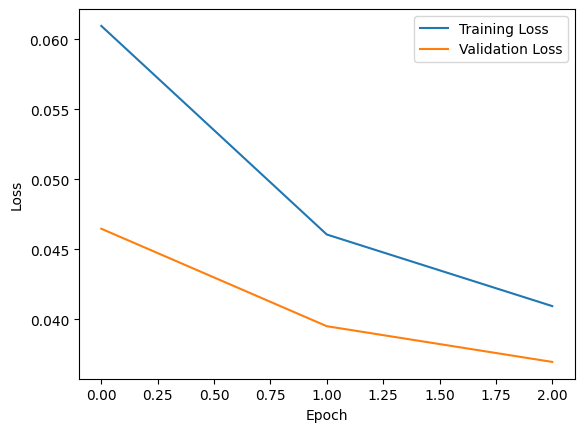

In [42]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
accuracy = model.evaluate(test_data)
print(accuracy)
#print(f"Test Accuracy: {accuracy:.2f}")

997/997 [==============================] - 43s 42ms/step - loss: 0.0364
0.03644789010286331
